# Theoretische Grundlagen

## Zuordnung kryptografische Mechanismen zu Schutzzielen

Mechnismus       | Beispiele                       | Vertraulichkeit | Integritaet | Authentizitaet | Verbindlichkeit | Verfuegbarkeit 
----------------:|--------------------------------:|:---------------:|:-----------:|:--------------:|:---------------:|:--------------:
Hash-Funktion    |MD5,SHA-1, SHA256                |                 | X           |                |                 |
HMAC             |                                 |                 | X           | X              |                 |
MAC              |                                 |                 | X           | X              |                 |
Verschluesselung |RSA,ElGamal,Transpositionschiffre| X               |             |                |                 |
Signaturen       |RSA,ElGamal                      |                 | X           | X              | X               |

## Definition Einwegfunktion

Eine Funktion $y = f(x)$ heisst Einwegfunktion wenn gilt:
  - Es gibt ein effizientes Verfahren zur Berechnung von $y=f(x)$.
  - Es gibt kein effizientes Verfahren zur Berechnung von $x=f^{-1}(y)$.

## Definition Trapdoor Einwegfunktionen

- Eine Variante der Einwegfunktion, welche effizient invertierbar ist, wenn man gewisse Zusatzinformationen besitzt.

## Symmetrische Verfahren der Verschluesselung

- substitutionsalgorithmen
    - monoalphabetische chiffre
      - additive chiffre

        verschluesselung: $e_K(x) = x + K \mod n$

        entschluesselung: $d_K(y) = y - K \mod n$

      - multiplikative chiffre

        verschluesselung: $e_K(x) = ax \mod n$

        entschluesselung: $d_K(y) = a^{-1}y \mod n$

        __Obacht:__ $a$ muss teilerfremd zu $n$ sein, da fuer die entschluesselung $a^{-1}$ benoetigt wird.

    - polyalphabetische chiffre

      => Die haefigkeit der Buchstaben wird verschleiert

      __Obacht:__ die Haeufigkeit von Buchstabengruppen wird nicht verschleiert

    - one-time-pad

      => Perfekt, wenn key wirklich zufaellig und gleich gross wie klartext ist

- Transpositionschiffren

  => Die position der zeichen wird getauscht
  

## Asymetrische Verfahren

### RSA

#### Mathematische Grundlage
- Basiert auf dem Faktorisierungsproblem

#### Angrifsmoeglichkeiten
  - Public-Key-Only-Attacke
  - Chosen-Ciphertext-Attacke
  - Chosen-Plaintext angriffe
  
  => Der private Schluessel kann aus dem oeffentlichen berechnet werden, wenn $\phi(n)$ oder $n=p \cdot q$ aus $n$ ermittelt werden koennen.
  
  - Bruteforce
     - Nur bei kurzen Schluessellaengen moeglich, weil extrem aufwendig. 
     
  - MITM 
     - Falls keine Signatur verwendet wird kann der Angreifer sich zu beginn der Kommunikation als eigentlicher Kommunikationspartner ausgeben.

### ElGamal

#### Mathematische Grundlage
- Basiert auf dem diskreten Logarithmus Problem

# Mathematische Grundlagen

## Gruppen auf endlichen Mengen

### Additive Gruppe

#### Definition

$\underline{G} = \{0, 1, 2, 3, ..., m-1\}$, wobei $m > 0$

$a \oplus b = r$

$\frac{a+b}{m}=q+\frac{r}{m} $$\iff$$ a + b = q \cdot m + r $


#### Addition

In [4]:
import math
import decimal

def gadd(m,a,b):
    return (a+b)%m

m = int (decimal.Decimal (input ("m:")))
a = int (decimal.Decimal (input ("a:")))
b = int (decimal.Decimal (input ("b:")))

print ("m =",m, ":", a, "⊕", b, "=",gadd(m,a,b))

m: 5
a: 2
b: 4


m = 5 : 2 ⊕ 4 = 1


#### Additiv inverses Element

$a \oplus (-a) = a \oplus (m - a) = 0$
$\iff$
$\frac{a+(m-a)}{m}=1+\frac{0}{m}$

### Multiplikative Gruppe

#### Definition

$\underline{G} = \{0, 1, 2, 3, ..., p-1\}$, wobei $p$ eine Primzahl ist.

$a \odot b = r$

$\frac{a \cdot b}{p}=q+\frac{r}{p} $$\iff$$ a \cdot b = q \cdot p + r $


#### Multiplikation

In [7]:
import math
import decimal

def gmul(p,a,b):
    return (a*b)%p

p = int (decimal.Decimal (input ("p:")))
a = int (decimal.Decimal (input ("a:")))
b = int (decimal.Decimal (input ("b:")))

print ("p =",p, ":", a, "⊙", b, "=",gmul(p,a,b))

p: 5
a: 2
b: 2


p = 5 : 2 ⊙ 2 = 4


#### Multiplikativ inverses Element

$ c \odot a = a \odot c = 1 $$\iff$$ c \cdot a = q \cdot p + 1$

In [5]:
from IPython.display import Math,HTML
import math
import decimal
import pandas as pd

table = []

def mulInv(n, a, depth =  1):
    table.append({"n": n, "a": a, "q": int(n/a), "r": n%a})
    if n%a == 0:
        return depth
    return mulInv(a, n%a, depth+1)
                  
def calcXy():
    
    first = True
    lastY = 1
    for i in reversed(table):
        if first:
            i['x'] = 0
            i['y'] = 1
            first = False
        else:
            i['x'] = lastY
            i['y'] = (1-i['n']*i['x'])/i['a']
            lastY = i['y']

def getAInverse():
    row = table[0]

    display(Math(str(row['n']) + '\cdot' + str(row['x']) + '+' + str(row['a']) + '\cdot' + str(row['y']) + '=1 \mod ' + str(row['n'])))
    display(Math('a \cdot a^{-1} = 1'))
    display(Math(str(row['a']) + '\cdot a^{-1} = 1'))
    display(Math(str(row['a']) + '\cdot' + str(row['y']) + '=1'))
    
    if (row['y'] > 0):
        return row['y']
    else:
        return row['n']+row['y']
            
def printTable():
    d = pd.DataFrame.from_dict(table)
    display(d)

    
    
n = int (decimal.Decimal (input ("n:")))
a = int (decimal.Decimal (input ("a:")))

mulInv(n,a)
calcXy()
display(Math('nx+ay=1'))
display(Math('y=\\frac{1-nx}{a}'))
printTable()
display(Math('a^{-1} =' + str(getAInverse())))


n: 26
a: 9


<IPython.core.display.Math object>

<IPython.core.display.Math object>

,n,a,q,r,x,y
0,26,9,2,8,-1.0,3.0
1,9,8,1,1,1.0,-1.0
2,8,1,8,0,0.0,1.0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Definition Zahlenkoerper

Die Menge $\underline{F}$ sei ein Zahlenkoerper bezueglich der Verknuepfungen $\oplus$ und $\odot$, wenn folgende Bedingungen erfuellt sind. 

  1. $\underline{F}$ ist bezueglich $\oplus$ eine additive Gruppe. Das Identitaetselement dieser Gruppe sei das Nullelement.
  2. Die von Null verschiedenen Elemente von $\underline{F}$  bilden eine multiplikative Gruppe bezueglich $\odot$. Das Identitaetselement dieser Gruppe sei das Einselement.
  3. Die Multiplication $\odot$ ist distributiv bezueglich der Addition $\oplus$, so dass gilt $a \odot (b \oplus c) = (a \odot b)\oplus(a \odot c)$ fuer $a, b, c \in \underline{F}$

### Modulare reduktion

#### Beispiel

$g^{a+b} = g^b \cdot g^b$

$17^{23} \mod 26$

aufsplitten funktioniert nur wenn $g^a > p$ 

$17^{23} = 17^4 \cdot 17^4 \cdot 17^4 \cdot 17^4 \cdot 17^4 \cdot 17^4 \cdot 17^1 = $

$17^4 \mod 26 = 9$

$17^{23} = 9 \cdot 9 \cdot 9 \cdot 9 \cdot 9 \cdot 9 \cdot 17 = 9^3 \cdot 9^3 \cdot 17$

$9^3 \mod 26 = 1$

$17^{23} = 1 \cdot 1 \cdot 17$

#### Code

In [34]:
from IPython.display import Math,HTML
import math
import decimal

def modRed(g, a, p, reduceTo):
    display(Math(str(g) +'^{' + str(a) + '} \mod ' + str(p)))
    display(Math('\iff'))
    
    np = int(a / reduceTo)
    nl = a % reduceTo

    string = ''
    for i in range(np):
        string += str(g) + '^' + str(reduceTo) + ' \mod ' + str(p) + ' \cdot '
    string += str(g) + '^{' + str(nl) + '} \mod ' + str(p)
    display(Math(string))
    
    reduced = (g**reduceTo)%p
    display(Math(str(g) + '^' + str(reduceTo) + ' \mod ' + str(p) + ' = ' + str(reduced))) 
    reduced2 = (g**nl)%p
    display(Math(str(g) + '^{' + str(nl) + '} \mod ' + str(p) + ' = ' + str(reduced2)))
    
    result = (reduced**np*reduced2)%p
    display(Math(str(reduced) + '^{' + str(np) + '} \cdot ' + str(reduced2) + ' \mod ' + str(p) + ' = ' + str(result)))
          
g = int (decimal.Decimal (input ("g:")))
a = int (decimal.Decimal (input ("a:")))
p = int (decimal.Decimal (input ("p:")))
          
modRed(g,a,p,3)
          

g: 17
a: 23
p: 26


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Eulersche $\phi$-Funktion

#### Satz von Euler
Fuer eine gegebene natuerliche Zahl $n$ gilt:

$a^{\phi(n)} = a^0 = 1 \mod n$ fuer $a>0$ und $ggT(n,a)=1$

Der Satz gilt fuer alle positiven und ganzzahligen Werte von $a$, die teilerfremd zu $n$ sind.

- Der Satz von Euler kann genutzt werden um das multiplikativ inverse Element $a^{-1}$ zu berechnen.

=> auf dem Exponenten kann modulo $\phi(n)$ gerechnet werden:

$a^{j \cdot \phi(n)) \mod \phi(n)} = a^0 = 1 \mod n$

Unter der Annahme, dass $n$ eine Primzahl ist und $\phi(n) = n - 1$ gilt, muss gelten:

$a^{n-1} = 1 \mod n$ fuer $a>0$ und $ggT(n,a)=1$



## GGT berechnen

In [8]:
import math
import decimal

def ggt_v01(x, y):
    while x > 0 and y > 0:
        if x >= y:
            x = x - y
        else:
            y = y - x
    return x+y

def ggt_v02(x, y):
    rest = 1
    while rest != 0: 
        if x >= y:
            rest = x % y
            x = y
            y = rest
            ggt = x
        else:
            rest = y % x
            y = x
            x = rest
            ggt=y
    return ggt


p = int (decimal.Decimal (input ("Zahl 1:")))
q = int (decimal.Decimal (input ("Zahl 2:")))

print("GGT Ansatz 1:",ggt_v01(p,q))
print("GGT Ansatz 2:",ggt_v02(p,q))


Zahl 1: 234465
Zahl 2: 214


GGT Ansatz 1: 1
GGT Ansatz 2: 1


# Symetrische Kryptographie

## Caesar

### Verschluesselung

In [17]:
key = int(input("Schluessel:"))
text = input("Klartext:").upper()

verschluesselter_text=""
for zeichen in text:
    zahl = ord(zeichen)
    neue_zahl = zahl + key
    if neue_zahl > ord('Z'):
        neue_zahl = neue_zahl - 26
    neuesZeichen = chr(neue_zahl)
    verschluesselter_text = verschluesselter_text + neuesZeichen
# Ausgabe
print(verschluesselter_text)

Schluessel: 7
Klartext: penis


WLUPZ


### Entschluesselung

In [18]:
key = int(input("Schluessel:"))
text = input("Geheimtext:").upper()

decrypted = ""
for zeichen in text:
    zahl = ord(zeichen)
    neue_zahl = zahl - key
    if neue_zahl < ord('A'):
        neue_zahl = neue_zahl + 26
    if neue_zahl == 58:
        neue_zahl = 32
    neuesZeichen = chr(neue_zahl)
    decrypted = decrypted + neuesZeichen
# Ausgabe
print(decrypted)


Schluessel: 7
Geheimtext: wlupz


PENIS


## Transpositionschiffre

### Spaltentransposition

In [56]:
import IPython.display
import pandas

inp = input("Geheimtext:")
spalten = int(input("Spalten:"))

rows = int(len(inp)/spalten)
Matrix.clear()
Matrix = [[0 for x in range(spalten)] for y in range(rows)] 

c = 0
for char in inp:
    column = int(c / rows)
    row = int(c% rows+1)-1
    Matrix[row][column] = char
    c += 1

d = pandas.DataFrame.from_dict(Matrix)
display(d)

Geheimtext: M:2Kon0ed=5yu00=l0,3
Spalten: 5


,0,1,2,3,4
0,M,o,d,u,l
1,:,n,=,0,0
2,2,0,5,0,","
3,K,e,y,=,3


## Angriffe

### Haeufigkeitsanalse

Filename bitte: klar.txt


a taucht 4 Mal:	 5.797%
b taucht nicht auf!		 0.000%
c taucht 3 Mal:	 4.348%
d taucht 5 Mal:	 7.246%
e taucht 10 Mal:	14.493%
f taucht nicht auf!		 0.000%
g taucht nicht auf!		 0.000%
h taucht 3 Mal:	 4.348%
i taucht 7 Mal:	10.145%
j taucht nicht auf!		 0.000%
k taucht 1 Mal auf:	 0.014%
l taucht 2 Mal:	 2.899%
m taucht 2 Mal:	 2.899%
n taucht 2 Mal:	 2.899%
o taucht 2 Mal:	 2.899%
p taucht nicht auf!		 0.000%
q taucht nicht auf!		 0.000%
r taucht 7 Mal:	10.145%
s taucht 7 Mal:	10.145%
t taucht 7 Mal:	10.145%
u taucht 3 Mal:	 4.348%
v taucht 1 Mal auf:	 0.014%
w taucht 2 Mal:	 2.899%
x taucht 1 Mal auf:	 0.014%
y taucht nicht auf!		 0.000%
z taucht nicht auf!		 0.000%

Gesamtzahl der Buchstaben: 69

Buchstabe e mit einer Häufigkeit von 10


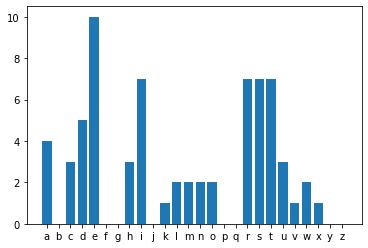

In [11]:
import numpy as np
import matplotlib.pyplot as plt


filename = input ("Filename bitte:")       # unsere Files Klartext und encrypted aus Wireshark
infile   = open(filename, "r")
s0       = infile.read()                   # die Datei ist in der Zeichenkette s0 gespeichert
s        = s0.lower()                      # alle die Grossbuchstaben werden klein geschrieben
infile.close()

a_ASCII = ord('a')
absolute_haeufigkeit = [0]*26
anz_buchstaben = 0

for x in s:
    if x.isalpha():                 # x ist ein Charakter
        absolute_haeufigkeit[ord(x) - a_ASCII] += 1
        anz_buchstaben                         += 1

graphx =[]
for i in range(26):
    graphx.append(chr(a_ASCII + i))
    if absolute_haeufigkeit[i] == 0:
        print(chr(a_ASCII + i) + " taucht nicht auf!\t\t" + 
              "{0: >6.3f}".format(absolute_haeufigkeit[i]/anz_buchstaben) + "%")
    elif absolute_haeufigkeit[i] == 1:
        print(chr(a_ASCII + i) + " taucht 1 Mal auf:\t" + 
              "{0: >6.3f}".format(absolute_haeufigkeit[i]/anz_buchstaben) + "%")
    else:
        print(chr(a_ASCII + i) + " taucht " + str(absolute_haeufigkeit[i]) + " Mal:\t" + 
              "{0: >6.3f}".format(100*absolute_haeufigkeit[i]/anz_buchstaben) + "%")

print("\nGesamtzahl der Buchstaben:", anz_buchstaben)

print ("\nBuchstabe", chr(a_ASCII + np.argmax(absolute_haeufigkeit)), "mit einer Häufigkeit von",np.max(absolute_haeufigkeit))

plt.bar(graphx,absolute_haeufigkeit)
plt.show()

# Asymetrische Kryptographie

## Diffie-Hellman Schlüsselaustausch

### Definition

Alice und Bob vereinbaren Modul $p$ und Basis $g$

Alice:
 - Erstellt (geheim): $a$
 - Berechnet: $\alpha = g^a \mod p$
 - Sendet $\alpha$ zu Bob
 - Empängt $\beta$ von Bob
 - Berechnet: $\beta^a \mod p$

Bob:
 - Erstellt (geheim): $b$
 - Berechnet: $\beta = g^b \mod p$
 - Sendet $\beta$ zu Alice
 - Empängt $\alpha$ von Alice
 - Berechnet: $\alpha^b \mod p$
 
 $K = g^{a \cdot b} \mod p = \beta^a \mod p = \alpha^b \mod p$

### Code

In [ ]:
from IPython.display import Math,HTML
import math
import decimal

p = int (decimal.Decimal (input ("p:")))
g = int (decimal.Decimal (input ("g:")))
a = int (decimal.Decimal (input ("a:")))
b = int (decimal.Decimal (input ("b:")))

def calc(g,a,p):
    return (g**a)%p

alpha = calc(g,a,p)
display(Math('\\alpha = ' + str(g) + '^{' + str(a) + '} \mod ' + str(p) + ' = ' + str(alpha)))
beta = calc(g,b,p)
display(Math('\\beta = ' + str(g) + '^{' + str(b) + '} \mod ' + str(p) + ' = ' + str(beta)))
alpha_b = calc(alpha,b,p)
display(Math('K_1 = ' + str(alpha) + '^{' + str(b) + '} \mod ' + str(p) + ' = ' + str(alpha_b)))
beta_a = calc(beta,a,p)
display(Math('K_2 = ' + str(beta) + '^{' + str(a) + '} \mod ' + str(p) + ' = ' + str(beta_a)))

if (alpha_b == beta_a):
    display(Math('K_= ' + str(beta_a) ))
        

## ElGamal Schluesselvereinbarung

### Definition

Alice:
  - bekommt $K_{pub} = (p,g,e)$ von Bob
  - ueberprueft ob  $K_{pub}$ wirklich zu Bob gehoert
  - waehlt Zufallszahl $k$
  - Berechnet Sitzungsschluessel $K=e^k \mod p$
  - Berechnet Schluesselwert $a=g^k \mod p$
  - Sendet $a$ an Bob
    
Bob:
  - $K_{pr} = d$
  - Empfaengt $a$ von Alice
  - Berechnet $K = a^d \mod p$
    
Verfikation:
    $a^d = g^{d \cdot k} = e^k = K \mod p$

### Schwachstellen

- Bob hat keine Sicherheit ueber die Herkunft von $K$, da jeder seinen $K_{pub}$ nutzen kann und $a$ kein Merkmal von Alice enthaelt

### Code

#### Alice

In [4]:
from IPython.display import Math,HTML
import math
import decimal

p = int (decimal.Decimal (input ("p:")))
g = int (decimal.Decimal (input ("g:")))
e = int (decimal.Decimal (input ("e:")))
k = int (decimal.Decimal (input ("k:")))

def calc(a,b,c):
    return (a**b)%c

K = calc(e,k,p)
a = calc(g,k,p)

display(Math('K = ' + str(e) + '^{' + str(k) + '} \mod ' + str(p) + ' = ' + str(K)))
display(Math('a = ' + str(g) + '^{' + str(k) + '} \mod ' + str(p) + ' = ' + str(a)))

p: 31
g: 7
e: 14
k: 12


<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Bob

In [6]:
from IPython.display import Math,HTML
import math
import decimal

d = int (decimal.Decimal (input ("d:")))
p = int (decimal.Decimal (input ("p:")))
a = int (decimal.Decimal (input ("a:")))

def calc(a,b,c):
    return (a**b)%c

K = calc(a,d,p)

display(Math('K = ' + str(a) + '^{' + str(d) + '} \mod ' + str(p) + ' = ' + str(K)))

d: 19
p: 31
a: 16


<IPython.core.display.Math object>

## RSA

### Definition

$K_{pub}=(n,e)$

$K_{pr}=(d)$

Eine Verschluesselungsfunktion $e()$ muss umkehrbar sein => es muss eine Funktion $d()$ geben, welche die Wirkung von $e()$  rueckgaenig macht:

$d_K(y) = d_K(e_K(x)) = x$

Die Kombination von Ver- und Entschluesselung fuehrt dabei auf 

$d_K(y) = d_K(e_K(x)) = e^{e \cdot d} = x^1 = x \mod n$

Mit der angegebenen Bedingung in der Form

$ d \cdot e = 1 \mod \phi(n)$

kann aus dem Geheimtext wieder der Klartet zurueckgewonnen werden.

Wird der Satz von Euler mit $i$ potenziert und mit $a$ multipliziert ergibt sich:

$a^{i \phi(n)+1} = a^{i \phi(n))} \cdot a = 1 \cdot a = a \mod n$

Die wesentliche Gleichung fuer RSA ergibt sich, indem der Exponent 

$i \cdot \phi(n) + 1$ druch $ e \cdot d$ ersetzt wird ($\mod (\phi(n))$)

Wenn $n$ eine Primzahl ist kann die Eulersche Phi-Funktion berechnet werden und die berechnung des geeheimen Schluessels ist moeglich:

$d \cdot e = 1 \mod \phi(n)$

### Key erzeugen

In [20]:
from IPython.display import Math
import math
import decimal
from sympy import isprime

def rsa_key(p,q,e=6157):
    n = p*q
    phi_n = (p-1)*(q-1)
    if (e <= 1 or e >= phi_n):
        print("e ist schlecht gewaehlt. fuer e sollte folgendes gelten: 1 < e < phi(n)")
    while math.gcd(e,phi_n)>1:
         e = e+1        
    d = 0
    h = 2
    while h!=1:
          d = d + 1
          h = e * d % phi_n
    return (n,d,phi_n)

p = int (decimal.Decimal (input ("p:")))
if (not isprime(p)):
    print("p ist keine Primzahl! -> Private Key kann berechnet werden")
q = int (decimal.Decimal (input ("q:")))
if (not isprime(q)):
    print("q ist keine Primzahl! -> Private Key kann berechnet werden")
e = int (decimal.Decimal(input("e (standard ist 6157):"))) 

n,d,phi_n = rsa_key(p,q,e)
display(Math('\phi(n) = ' +  str(phi_n)))
display(Math('K_{pub} = ('+  str(n) + ',' + str(e) +')'))
display(Math('K_{pr} = ('+  str(d) +')'))


p: 5
q: 11
e (standard ist 6157): 7


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Verschluesseln

$ y=e_{K_{pub}}(x)=x^e \mod n $

In [16]:
import math

def rsa_encrypt(n,e,x):
    y =x**e % n
    return y 

n = int (decimal.Decimal (input ("n (Public):")))
e = int (decimal.Decimal (input ("e (Public):")))
x = int (decimal.Decimal (input ("x (Klartext):")))

y = rsa_encrypt(n,e,x)
print ("y (Geheimtext): ", y)

n (Public): 51
e (Public): 31
x (Klartext): 14


y (Geheimtext):  11


### Entschluesseln

$ x=d_{K_{pr}}(y)=y^d \mod n $

In [21]:
import math

def rsa_decrypt(n,d,y):
    x =y**d % n
    return x 


n = int (decimal.Decimal (input ("n (Public):")))
d = int (decimal.Decimal (input ("d (Private):")))
y = int (decimal.Decimal (input ("y (Geheimtext):")))

x = rsa_encrypt(n,d,y)
print ("x (Klartext): ", x)

n (Public): 55
d (Private): 23
y (Geheimtext): 5


x (Klartext):  15


### Signieren

$K_{pr} = d$

$s=e_{K_{pr}}(x) = x^d \mod n$

=> Es wird $s$ und $x$ veroeffentlicht. Die signatur kann von jedem mit $K_{pub}$ geprueft werden

In [17]:
from IPython.display import Math
import math

d = int (decimal.Decimal (input ("d (Private):")))
n = int (decimal.Decimal (input ("n (Public):")))
x = int (decimal.Decimal (input ("x (Nachricht):")))

s = x**d%n

display(Math('s=x^d \mod n'))
display(Math('s=' + str(x) + '^{' + str(d) +'} \mod ' + str(n)  + '=' + str(s)))

d (Private): 1
n (Public): 2
x (Nachricht): 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Signatur ueberpruefen

$K_{pub} = (n, e)$

$x = d_{K_{pub}}(s) = s^e \mod n$

=> Wenn das berechnete $x$ mit der Nachricht $x$ uebereinstimmt wurde die Nachricht nicht veraendert

In [18]:
from IPython.display import Math
import math

n = int (decimal.Decimal (input ("n (Public):")))
e = int (decimal.Decimal (input ("e (Public):")))
s = int (decimal.Decimal (input ("s (Signatur):")))

x = s**e%n

display(Math('x=s^e \mod n'))
display(Math('x=' + str(s) + '^{' + str(e) +'} \mod ' + str(n)  + '=' + str(x)))

e (Public): 7
n (Public): 6283
s (Signatur): 5742


<IPython.core.display.Math object>

<IPython.core.display.Math object>

## ElGamal

### Definition

Oeffentlich bekannt:
 - Eine grosse Primzahl $p$
 - eine Basis $g$ aus dem Galois-Koerper $GF(p)$
    
Jeder Teilnehmer waehlt jeweils einen privaten Schluessel
$K_{pr} = d$
und berechnet den zugehoerigen oeffentlichen Schluessel $K_{pub} = e$ 
ueber
$e=g^d \mod p$

=> Die Ermittlung des privaten Schluessels $K_{pr} =d$ aus dem oeffentlichen  ist bei genuegend grossem Modul $p$ nicht durchfuehrbar.

### Verschluesselung

$K_{pub} = (p,g,e)$

$a=g^k \mod p$

$b=e^k \cdot m \mod p$

der Geheimtext besteht aus $a$ und $b$

k muss teilerfremd zu p-1 sein. 

In [10]:
from IPython.display import Math
import math

p = int (decimal.Decimal (input ("p (Public):")))
g = int (decimal.Decimal (input ("g (Public):")))
e = int (decimal.Decimal (input ("e (Public):")))
k = int (decimal.Decimal (input ("k (Zufall):")))
m = int (decimal.Decimal (input ("m (Klartext):")))

a = g**k%p
b = ((e**k)*m)%p

display(Math('a=g^k \mod p'))
display(Math('a=' + str(g) + '^{' + str(k) +'} \mod ' + str(p)  + '=' + str(a)))

display(Math('b=e^k \cdot m \mod p'))
display(Math('b=' + str(e) + '^{' + str(k) +'} \cdot ' + str(m) + ' \mod ' + str(p)  + '=' + str(b)))

p (Public): 23
g (Public): 5
e (Public): 22
k (Zufall): 5
m (Klartext): 11


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Entschluesselung

$K_{pr} = d$

$m = a^{p-d-1} \cdot b \mod p$

In [11]:
from IPython.display import Math
import math

d = int (decimal.Decimal (input ("d (Private):")))
p = int (decimal.Decimal (input ("p (Public):")))
a = int (decimal.Decimal (input ("a (Geheimtext):")))
b = int (decimal.Decimal (input ("b (Geheimtext):")))

m = (a**(p-d-1))*b%p

display(Math('m = a^{p-d-1} \cdot b \mod p'))
display(Math('m=' + str(a) + '^{' + str(p) + '-' + str(d) + '-1} \cdot ' + str(b) + '\mod ' + str(p)  + '=' + str(m)))

d (Private): 11
p (Public): 23
a (Geheimtext): 20
b (Geheimtext): 12


<IPython.core.display.Math object>

<IPython.core.display.Math object>